In [464]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

## Data Description

- CAC40, previously known as Bourse de Paris, is a benchmark French stock market index. 
- The index represents a capitalization-weighted measure of the 40 most significant stocks among the 100 largest market caps on the Euronext Paris. 
- Its acronym stands for Cotation Assistée en Continu, which translates to continuous assisted trading, and is used as a benchmark index for funds investing in the French stock market.
- This dataset is scrapped from a finance website. It contains all daily CAC40 Stocks from 2010 to 2021.

In [67]:
df = pd.read_csv('data/CAC40_stocks_2010_2021.csv')

In [68]:
df.duplicated().sum()

0

In [69]:
df.isna().sum()

CompanyName    0
StockName      0
High           0
Low            0
Open           0
Close          0
Volume         0
Date           0
dtype: int64

### No duplicate and Null values

In [70]:
df.head()

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08


In [71]:
df.shape

(81735, 8)

In [72]:
df['CompanyName'].unique()

array(['TechnipFMC', 'Atos', 'Publicis', 'Accor', 'Carrefour', 'Renault',
       'Veolia', 'Bouygues', 'Sodexo', 'ArcelorMittal', 'Capgemini',
       'Thales Group', 'Groupe PSA', 'Michelin', 'Legrand',
       'Unibail-Rodamco-Westfield', 'Saint-Gobain', 'STMicroelectronics',
       'Société Générale', 'Vivendi', 'Engie', 'Orange',
       'Crédit Agricole', 'Dassault Systèmes', 'Pernod Ricard', 'Danone',
       'Schneider Electric', 'Air Liquide', 'Vinci', 'Essilor', 'AXA',
       'Safran', 'BNP Paribas', 'Kering', 'Hermès', 'Airbus', 'Sanofi',
       'Total', 'L’Oréal', 'LVMH'], dtype=object)

In [73]:
df.describe()

,High,Low,Open,Close,Volume
count,81735.000000,81735.000000,81735.000000,81735.000000,8.173500e+04
mean,52.689439,51.763152,52.230574,52.233152,1.504557e+06
std,204.869608,203.886170,204.157064,204.455254,2.705040e+06
min,0.005000,0.005000,0.005000,0.005000,0.000000e+00
25%,17.295000,16.857500,17.060273,17.041016,2.700000e+03
50%,32.599998,32.599998,32.599998,32.599998,3.947270e+05
75%,50.615000,49.441797,50.040001,50.044415,2.014200e+06
max,12650.000000,12203.000000,12203.000000,12529.000000,1.291250e+08


In [74]:
df1 = df.copy(deep = True)

In [75]:
df1.index = df1['Date']

In [76]:
data = df1.drop('Date', axis = 1)

## Exploratory Data Analysis

### Charts for showing `Change over Time`

#### Let us see the trendline of Accor over the years

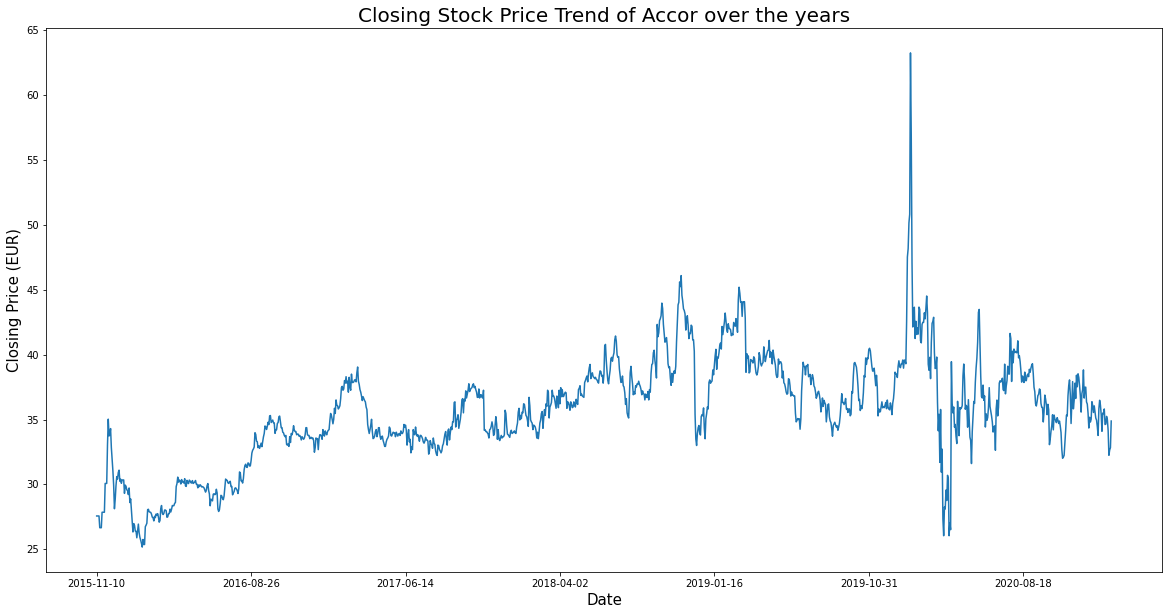

In [77]:
plt.figure(figsize = (20,10))
data[data['CompanyName'] == 'Accor']['Close'].plot()
plt.title('Closing Stock Price Trend of Accor over the years', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price (EUR)', fontsize = 15)
plt.show()

### Inferences:
- The stock grows across the years, but we can say that it is pretty volatile stock in a for this short time frame. 
- Also we can see a very high spike in the prices somewhere around, January,2020 for quite a few days,
- Then the price drops drastically, in the month of March,2020 and April,2020 and then again becomes stable from the month of June.
### Design Principles:
- Connectedness - The points connect to reveal a pattern/trend.
- The graph is simple, no complicated designs.

#### OHLC chart for Accor. This is similar to Candlesticks charts.

In [542]:
df_accor = df[df['CompanyName'] == 'Accor'].copy()
df_accor['Date'] = pd.to_datetime(df_accor['Date']) 
df_accor = df_accor[(df_accor['Date'].dt.year == 2020) & (df_accor['Date'].dt.month < 4)]
df_accor.reset_index(inplace=True)

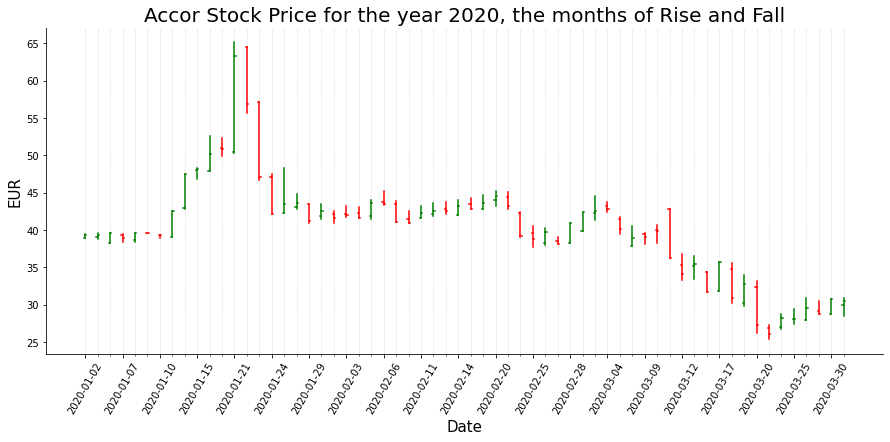

In [544]:
x = np.arange(0, len(df_accor))
fig, ax = plt.subplots(1, figsize = (15,6))
for idx,val in df_accor.iterrows():
    color = 'green'
    if val['Open'] > val['Close']: 
        color= 'red'
    plt.plot([x[idx], x[idx]], [val['Low'], val['High']], color = color)
    plt.plot([x[idx], x[idx]-0.1], [val['Open'], val['Open']], color = color)
    plt.plot([x[idx], x[idx]+0.1], [val['Close'], val['Close']], color = color)

plt.xticks(x[::3], df_accor.Date.dt.date[::3], rotation = 60)
ax.set_xticks(x, minor=True)
plt.ylabel('EUR', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Accor Stock Price for the year 2020, the months of Rise and Fall', fontsize=20)
plt.show()

### Inferences:
- For the year 2020 alone, we can clearly see how the prices were stable in the beginning and how it rose suddenly, followed by a enormous drop, which can be credit to a lot of people pulling out their money, due to the sudden rise, which led to this humongous fall. 
- Also, then we can notice that, the stock slowly came back to equilibrium, but again, a fall happened, mostly because, people who could not withdraw their money during the rise, thought of exitting on the peak, could not withdraw during the sudden fall, held the stock for getting the least loss, and then withdrew when the stock hit equilibrium, this led to the stock dropping.
### Design Principles:
- Continuity - Non connected elements/objects give us a complete picture, here, this shows us the trend. And also shows us a bigger/detailed picture of the inference made from the above graph.

***

### Charts for showing `Part-to-whole composition` 

#### Let us see how much of the total market volume is contributed by top 10 stocks

In [175]:
vol = dict(data.groupby('CompanyName').sum()['Volume'])
total = sum(vol.values())
vol = {k:v/total for k,v in vol.items()}
raw_data = sorted((value,key) for (key,value) in vol.items())
rdf = [raw_data[x][0] for x in range(0, len(raw_data)-10)]
chart_data = dict(raw_data[len(vol)-10:])
others = sum(rdf)
chart_data[others] = 'Others'
cdata = chart_data.keys()
clabs = chart_data.values()

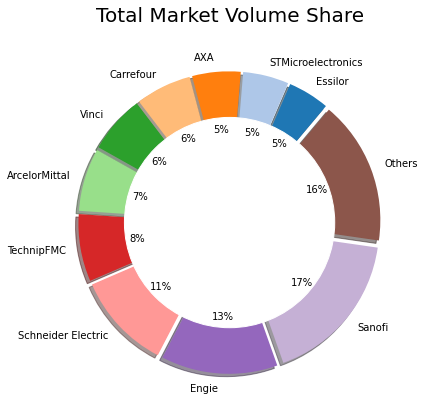

In [213]:
fig,ax = plt.subplots(1, figsize = (6,6))
ax.pie(cdata, labels = clabs, autopct='%.0f%%', shadow = True, startangle = 50, colors = cm.tab20(np.arange(11)), explode = [0.05]*11)
ax.axis('equal')
ax.set_title('Total Market Volume Share', fontsize = 20, loc= 'center', y = 1.1)
my_circle=plt.Circle((0,0), 0.73, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Inferences:
- The marketshare is driven by 5 big companies, The company Sanofi has the highest Volume percentage in the market, followed by Engie, Schneider Electric, TehcnipFMC and then ArcelorMittal

### Design Principles:
- Proportions
- Closure

***

### Charts showing the `distribution of data`

#### Seeing the distribution of Volume of companies 

In [240]:
vol_data = pd.pivot_table(data = data, index = 'CompanyName', values = 'Volume', aggfunc = np.sum).sort_values('Volume', ascending = False)

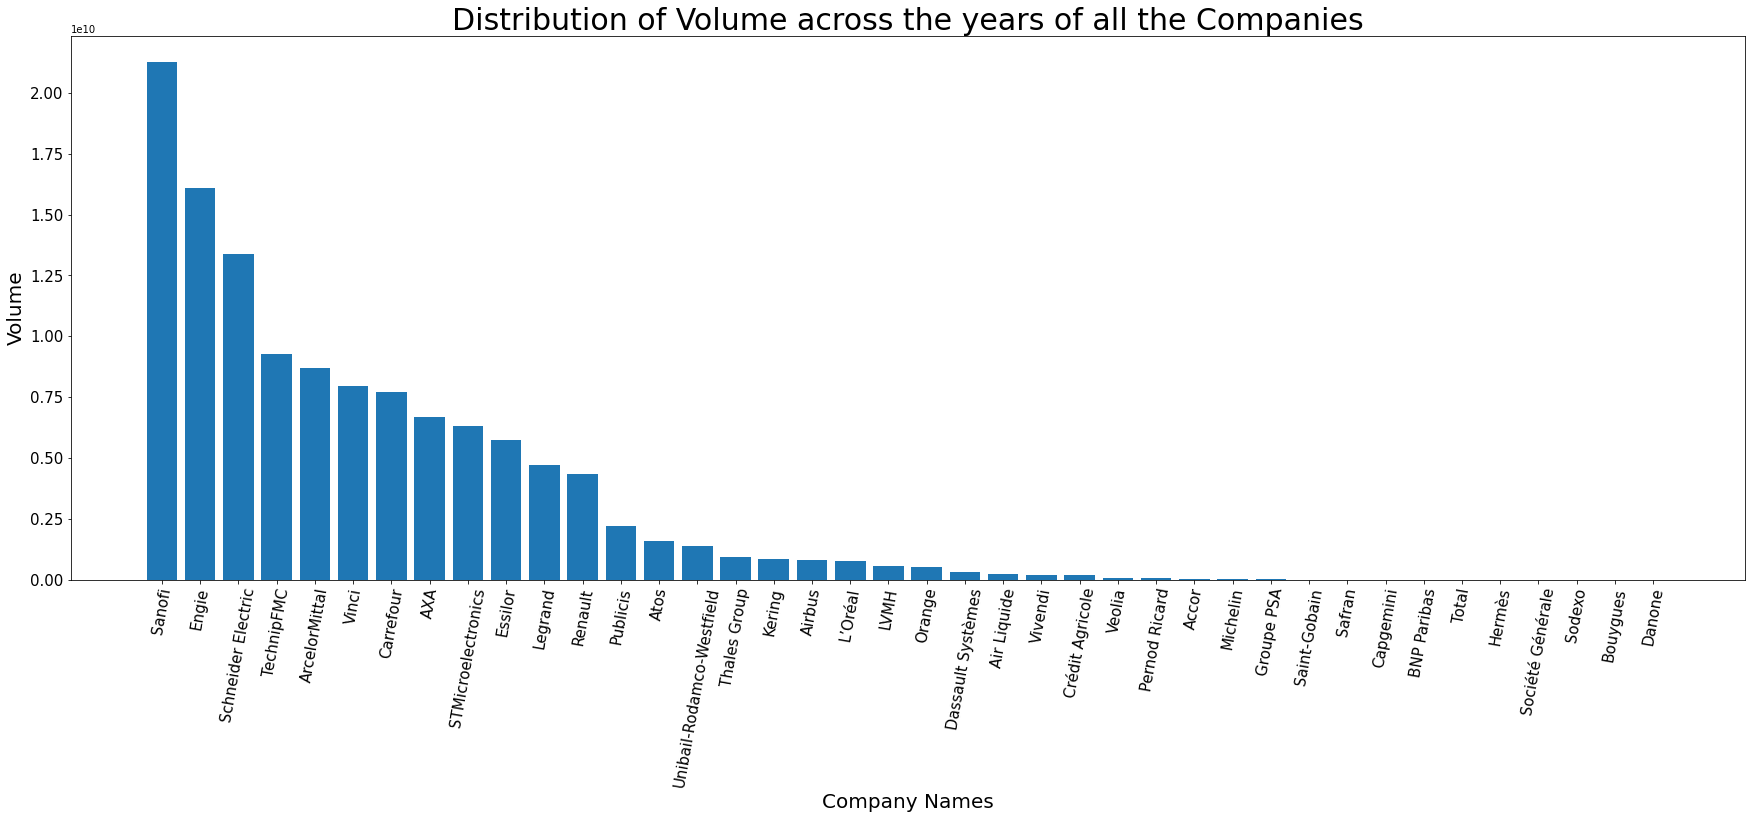

In [279]:
plt.figure(figsize = (30,10))
plt.bar(x = vol_data.index , height = vol_data.Volume)
plt.xlabel('Company Names', fontsize = 20)
plt.ylabel('Volume', fontsize = 20)
plt.xticks(rotation = 80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Distribution of Volume across the years of all the Companies', fontsize = 30)
plt.show()

### Inferences:
- This graph shows us how massive is the scale of the top 5 companies, and also, Sanofi and Engie, when compared to all the others. And also, how the market share of volume is distributed.
### Design Principles:
- Data is sorted before plotting, makes the interpretation easier
- The above plot gives same information but interpretation is slightly different and might differ from use cases to use cases.

#### Seeing how `Sanofi`'s Volume is distributed 

In [281]:
vol_sanofi = data[data['CompanyName'] == 'Sanofi']['Volume']

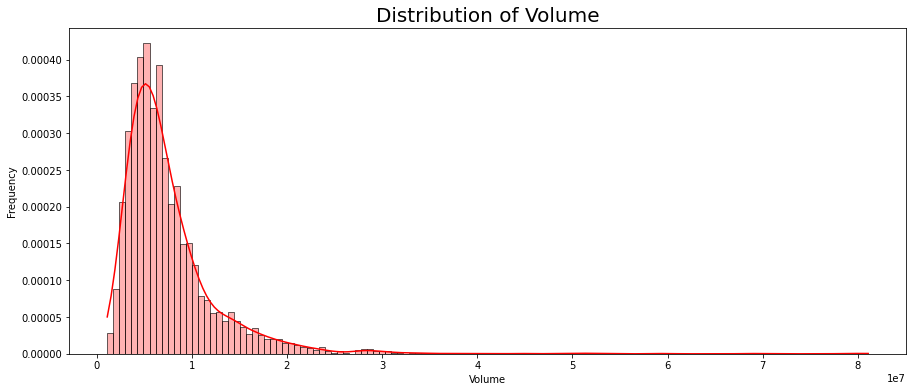

In [308]:
plt.figure(figsize = (15,6))
sns.histplot(vol_sanofi, kde = True, stat = 'frequency', cbar = True, color = 'red', alpha = .3, line_kws = {'color': 'blue'})
plt.title('Distribution of Volume', fontsize = 20)
plt.xlabel('Volume', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

### Inferences:
- The Volume of Sanofi is Right skewed
### Design Principles:
- Similarity
- Common region
- Enclosure

#### Day-to-Day percentage change (Daily Returns) of the Company Sanofi

In [465]:
sanofi_df = data[data['CompanyName'] == 'Sanofi']

In [466]:
sanofi_df['PercChange'] = sanofi_df['Close'].pct_change()*100

In [467]:
sanofi_df.dropna(axis = 0, inplace = True)

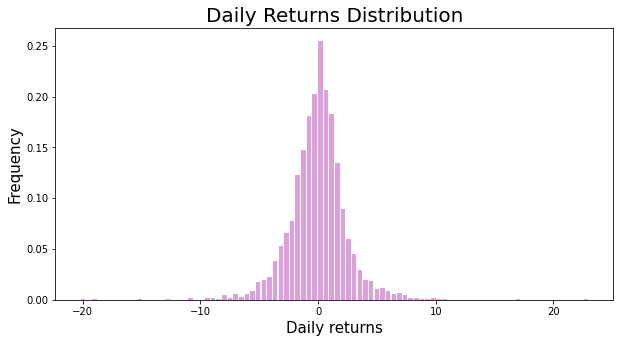

count    2788.000000
mean       -0.032334
std         2.456520
min       -20.208338
25%        -1.262317
50%         0.000000
75%         1.211797
max        22.990847
Name: PercChange, dtype: float64

In [468]:
plt.figure(figsize = (10,5))
plt.hist(sanofi_df['PercChange'], bins = 90, density = True, rwidth = .8, color = 'plum')
plt.title('Daily Returns Distribution', fontsize = 20)
plt.xlabel('Daily returns', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()
sanofi_df.PercChange.describe()

### Inferences:
- The Daily Returns histogram is centered about the origin.
- For the past years, the mean daily returns has been about -0.03 and for most of the days the daily returns was almost 0, implying the stock was not very volatile.
- During the period, the highest percentage change in the positive direction was 22.9 and 20.20 in the negative direction. There was a massive bullrun and a beardrop.
### Design Principles:
- Principle of Closure
- Enclosure
- Proximity

***

### Charts showing `comparison between groups`

#### Let us compare how different companies volume changed over time

In [314]:
df['Date'] = pd.to_datetime(df['Date']) 

In [322]:
group_df = df.copy(deep = True)

In [334]:
group_df['Date'] = group_df['Date'].apply(lambda x: x.year)

In [338]:
groups = pd.pivot_table(data = group_df, index = 'Date', values = 'Volume', columns = 'CompanyName', aggfunc= np.sum)

In [346]:
groups = groups.filter(items = ['Sanofi', 'Engie', 'Schneider Electric', 'TechnipFMC', 'ArcelorMittal'])

In [432]:
tdf = groups.tail(2)

In [433]:
tdf

CompanyName,Sanofi,Engie,Schneider Electric,TechnipFMC,ArcelorMittal
Date,,,,,
2020,2.461368e+09,1.859758e+09,1.819774e+09,1.561879e+09,1.137412e+09
2021,1.509744e+08,1.152649e+08,1.694413e+08,1.846154e+08,1.005785e+08


### Inferences:
- This table shows us the Market volume of the top 5 companies in the years, 2020 and 2021, we can clearly see that all the companies have taken a fall in 2021(COVID-19 possibly or the uncertainity of macroeconomics) resulting in a lesser market volume.
### Design Principles:
- Tables instead of Graph
- Easier for comparison
- Looks neater

#### Closing Stock Price comparison

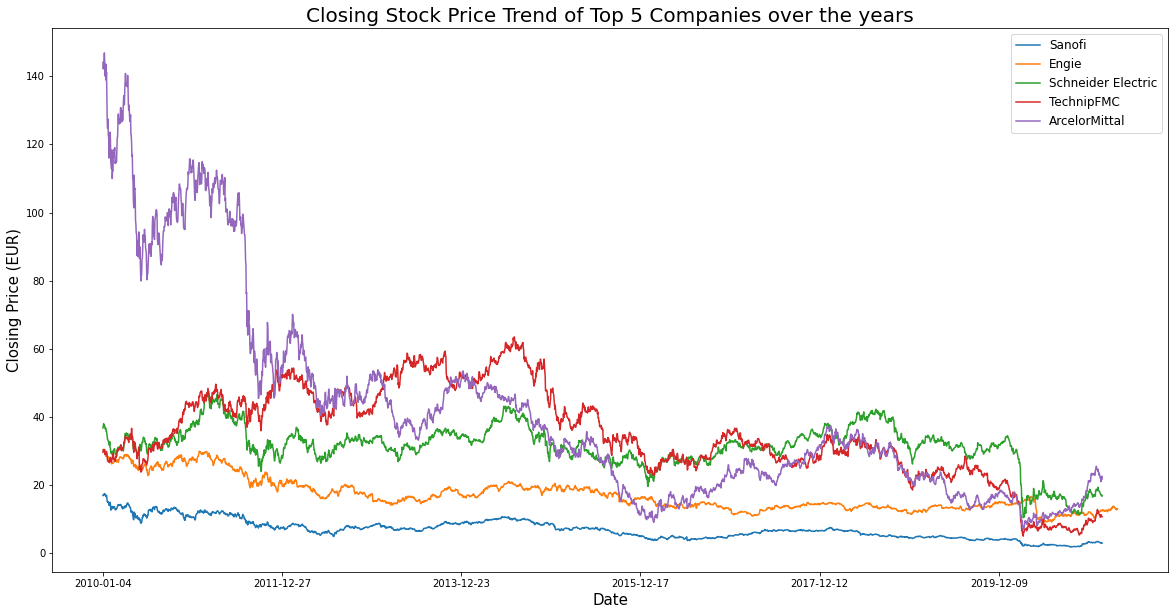

In [559]:
fig, ax = plt.subplots(1, figsize = (20,10))
top5 = ['Sanofi', 'Engie', 'Schneider Electric', 'TechnipFMC', 'ArcelorMittal']
for name in top5:
    data[data['CompanyName'] == name]['Close'].plot()

plt.title('Closing Stock Price Trend of Top 5 Companies over the years', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price (EUR)', fontsize = 15)

# for k,v in ax.spines.items():
#     v.set_visible(False)
# ax.set_xticks([])
# ax.set_yticks([])
ax.legend(top5, fontsize = 'large')
plt.show()

### Inferences:
- From this grouped lineplot we can see the change over time and also compare.
- We can understand that ArcelorMittal(purple) is a highly volatile stock whereas (Sanofi and Engie) are not very volatile stocks.
### Design Principles:
- Used this because only 5 companies were present.
- Easy to understand
- Similarity principle

***

### Charts showing `relationships between variables`

#### Relationship between Open and Close values

In [560]:
scatter_df = df[(df['CompanyName'] == 'Sanofi') | (df['CompanyName'] == 'ArcelorMittal')]

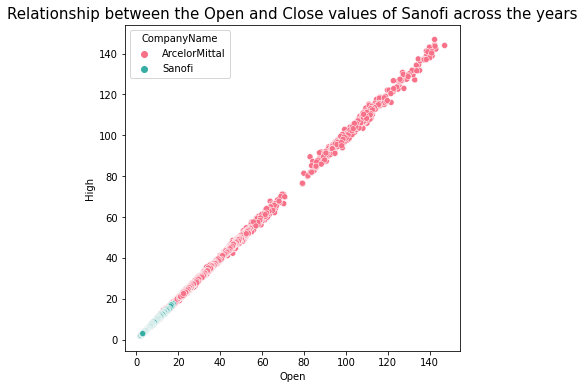

In [566]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = scatter_df, x = 'Open', y = 'Close', hue = 'CompanyName', palette = 'husl')
plt.title('Relationship between the Open and Close values of Sanofi across the years', fontsize = 15)
plt.xlabel('Open', fontsize = 10)
plt.ylabel('High', fontsize = 10)
plt.show()

### Inferences:
- We can see that the Open and Close prices are linear for both, the most volatile stock and the most stable stock.
### Design Principles:
- Light colors have been used
- Stock is simple enough to derive inferences.

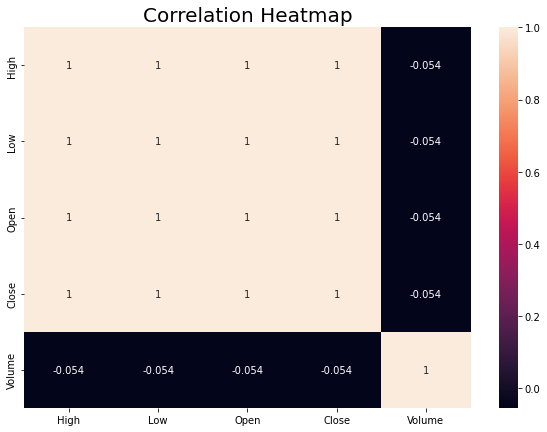

In [519]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

### Inferences:
- We can see that all the Open, High, Low and Close features are linearly correlated, with r= 1.
- Also, that Volume is almost not correlated with the other features

***